In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist

In [4]:
#loading data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
#normalizing data
x_train,x_test = x_train/ 255.0,x_test/ 255.0

In [6]:
K = len(np.unique(y_train)) # Classes
print(K)

10


In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train.shape

(50000, 32, 32, 3)

In [23]:
#using keras sequantial models 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32,32,3)))#adding convolution layer C32
model.add(MaxPooling2D(pool_size=(2, 2)))#maxpooling by 2x2 
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))#C64
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))#C64
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Flatten())#make the output into a 1D array for full connected layers 
model.add(Dense(64, activation='sigmoid'))#hidden layer with 64 nodes 
model.add(Dense(10))#output 

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [26]:
#sgd as the optimizer 
sgd=tf.keras.optimizers.SGD(learning_rate=0.017,decay=0.99,momentum=0.9)

In [27]:
#compile the model 
model.compile(optimizer='sgd',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=50)

Epoch 1/100
1000/1000 [==============================] - 85s 85ms/step - loss: 2.2733 - accuracy: 0.1673 - val_loss: 2.1922 - val_accuracy: 0.2111
Epoch 2/100
1000/1000 [==============================] - 73s 73ms/step - loss: 2.0599 - accuracy: 0.2633 - val_loss: 1.9743 - val_accuracy: 0.2797
Epoch 3/100
1000/1000 [==============================] - 69s 69ms/step - loss: 1.9187 - accuracy: 0.3107 - val_loss: 1.8453 - val_accuracy: 0.3455
Epoch 4/100
1000/1000 [==============================] - 68s 68ms/step - loss: 1.8075 - accuracy: 0.3600 - val_loss: 1.7302 - val_accuracy: 0.3830
Epoch 5/100
1000/1000 [==============================] - 70s 70ms/step - loss: 1.7028 - accuracy: 0.3935 - val_loss: 1.6874 - val_accuracy: 0.3934
Epoch 6/100
1000/1000 [==============================] - 69s 69ms/step - loss: 1.6159 - accuracy: 0.4236 - val_loss: 1.5708 - val_accuracy: 0.4360
Epoch 7/100
1000/1000 [==============================] - 73s 73ms/step - loss: 1.5484 - accuracy: 0.4486 - val_loss: 1

1000/1000 [==============================] - 71s 71ms/step - loss: 0.6186 - accuracy: 0.7907 - val_loss: 0.9141 - val_accuracy: 0.6920
Epoch 57/100
1000/1000 [==============================] - 75s 75ms/step - loss: 0.6058 - accuracy: 0.7950 - val_loss: 0.9138 - val_accuracy: 0.6876
Epoch 58/100
1000/1000 [==============================] - 73s 73ms/step - loss: 0.5969 - accuracy: 0.7973 - val_loss: 0.9156 - val_accuracy: 0.6881
Epoch 59/100
1000/1000 [==============================] - 80s 80ms/step - loss: 0.5878 - accuracy: 0.8014 - val_loss: 0.9161 - val_accuracy: 0.6869
Epoch 60/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.5779 - accuracy: 0.8059 - val_loss: 0.9450 - val_accuracy: 0.6816779 - accuracy: 0. - ETA: 1s - loss: 0.5777 - accuracy: 0. - E
Epoch 61/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.5680 - accuracy: 0.8085 - val_loss: 0.9194 - val_accuracy: 0.6874
Epoch 62/100
1000/1000 [==============================] - 70s 7

In [28]:
#model evaluation 
loss_train,acc_train= model.evaluate(x_train,y_train)
loss_test,acc_test= model.evaluate(x_test,y_test)
print("Train accuracy=",acc_train*100,"%")
print("Train Loss=",loss_train)
print("Test accuracy=",acc_test*100,"%")
print("Test Loss=",loss_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0406 - accuracy: 0.6904
Train accuracy= 94.42600011825562 %
Train Loss= 0.23182989656925201
Test accuracy= 69.04000043869019 %
Test Loss= 1.040618896484375


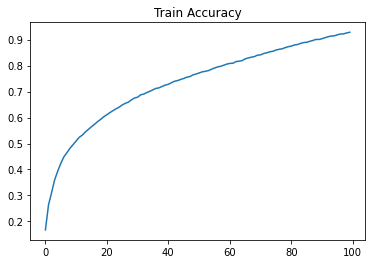

In [29]:
# accuracy train
plt.plot(history.history['accuracy'])
plt.title("Train Accuracy")
plt.show()

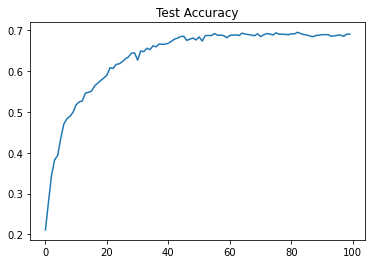

In [30]:
# accuracy test
plt.plot(history.history['val_accuracy'])
plt.title("Test Accuracy")
plt.show()

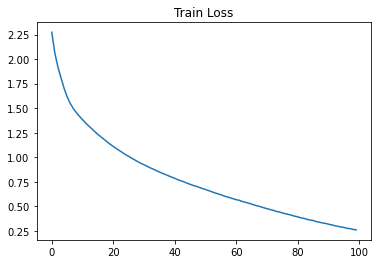

In [31]:
# loss history
plt.plot(history.history['loss'])
plt.title("Train Loss")
plt.show()